In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Model and model-related stuff
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Loading the data

In [2]:
DIR_DATASET = os.path.join(os.getcwd(), 'dataset')
DIR_SUBMISSIONS = os.path.join(os.getcwd(), 'submissions')

X = pd.read_csv(os.path.join(DIR_DATASET, 'X_train.csv'))
y = pd.read_csv(os.path.join(DIR_DATASET, 'y_train.csv'))
test = pd.read_csv(os.path.join(DIR_DATASET, 'test.csv'))

display(X)
display(y)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,age_bin,age_bin_number,fare_bin,fare_bin_number,...,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_group_Master,title_group_Miss,title_group_Mr,title_group_Mrs,title_group_Other
0,1,3,22.0,1,0,7.2500,"(20.0, 30.0]",2,"(-0.001, 10.0]",0,...,0,1,0,0,1,0,0,1,0,0
1,2,1,38.0,1,0,71.2833,"(30.0, 40.0]",3,"(70.0, 80.0]",7,...,1,0,1,0,0,0,0,0,1,0
2,3,3,26.0,0,0,7.9250,"(20.0, 30.0]",2,"(-0.001, 10.0]",0,...,1,0,0,0,1,0,1,0,0,0
3,4,1,35.0,1,0,53.1000,"(30.0, 40.0]",3,"(50.0, 60.0]",5,...,1,0,0,0,1,0,0,0,1,0
4,5,3,35.0,0,0,8.0500,"(30.0, 40.0]",3,"(-0.001, 10.0]",0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,"(20.0, 30.0]",2,"(10.0, 20.0]",1,...,0,1,0,0,1,0,0,0,0,1
887,888,1,19.0,0,0,30.0000,"(10.0, 20.0]",1,"(20.0, 30.0]",2,...,1,0,0,0,1,0,1,0,0,0
888,889,3,21.5,1,2,23.4500,"(20.0, 30.0]",2,"(20.0, 30.0]",2,...,1,0,0,0,1,0,1,0,0,0
889,890,1,26.0,0,0,30.0000,"(20.0, 30.0]",2,"(20.0, 30.0]",2,...,0,1,1,0,0,0,0,1,0,0


,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# Split the data into training and validation datasets

In [3]:
features = ['PassengerId',
            'Pclass',
            # 'SibSp',
            # 'Parch',
            'fare_bin_number',
            'age_bin_number',
            'has_cabin',
            # 'is_alone',
            'family_size',
            'Sex_female',
            'Sex_male',
            'Embarked_C',
            'Embarked_Q',
            'Embarked_S',
            'title_group_Mr',
            'title_group_Master',
            'title_group_Miss',
            'title_group_Mrs',
            'title_group_Other']

X = X[features]
X

,PassengerId,Pclass,fare_bin_number,age_bin_number,has_cabin,family_size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_group_Mr,title_group_Master,title_group_Miss,title_group_Mrs,title_group_Other
0,1,3,0,2,0,1,0,1,0,0,1,1,0,0,0,0
1,2,1,7,3,1,1,1,0,1,0,0,0,0,0,1,0
2,3,3,0,2,0,0,1,0,0,0,1,0,0,1,0,0
3,4,1,5,3,1,1,1,0,0,0,1,0,0,0,1,0
4,5,3,0,3,0,0,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,2,0,0,0,1,0,0,1,0,0,0,0,1
887,888,1,2,1,1,0,1,0,0,0,1,0,0,1,0,0
888,889,3,2,2,0,3,1,0,0,0,1,0,0,1,0,0
889,890,1,2,2,1,0,0,1,1,0,0,1,0,0,0,0


In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# Saves train indexes
y_val_index = list(y_val.index)

# Reset indexes
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_val.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

# Scale numerical features to improve model convergence and training speedb

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   PassengerId         712 non-null    int64
 1   Pclass              712 non-null    int64
 2   fare_bin_number     712 non-null    int64
 3   age_bin_number      712 non-null    int64
 4   has_cabin           712 non-null    int64
 5   family_size         712 non-null    int64
 6   Sex_female          712 non-null    int64
 7   Sex_male            712 non-null    int64
 8   Embarked_C          712 non-null    int64
 9   Embarked_Q          712 non-null    int64
 10  Embarked_S          712 non-null    int64
 11  title_group_Mr      712 non-null    int64
 12  title_group_Master  712 non-null    int64
 13  title_group_Miss    712 non-null    int64
 14  title_group_Mrs     712 non-null    int64
 15  title_group_Other   712 non-null    int64
dtypes: int64(16)
memory usage: 89.1 KB


In [6]:
# Drops the passengerId column
X_train.drop('PassengerId', axis=1, inplace=True)
X_val.drop('PassengerId', axis=1, inplace=True)

# Scales numerical columns
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()

# Scale features to have 0 average and 1 standard deviation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val_scaled)

# Train the model

In [7]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train['Survived'])

LogisticRegression()

## Evaluate the model

Accuracy: 0.8045
Precision: 0.7714
Recall: 0.7397
F1-score: 0.7552

Confusion Matrix:


array([[90, 16],
       [19, 54]], dtype=int64)

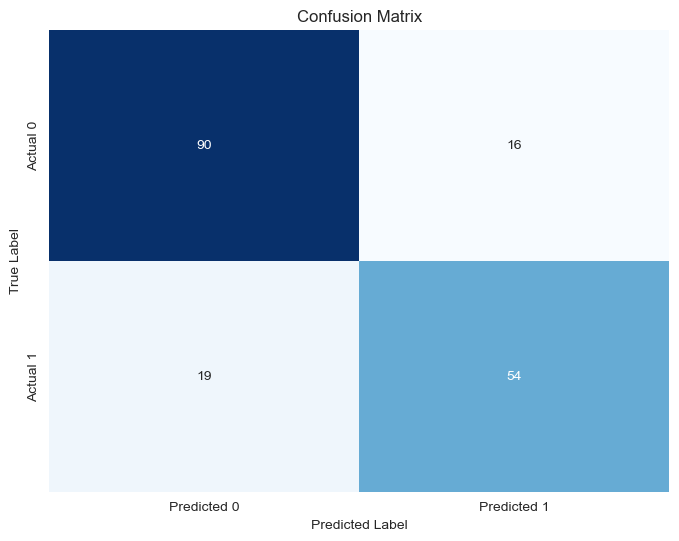

In [8]:
# Make predictions on the validation set
y_pred_array = model.predict(X_val_scaled)
y_pred = pd.DataFrame({'Survived': y_pred_array})

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
display(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Features importance in predictions

In [9]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': abs(model.coef_[0])
}).sort_values('importance', ascending=False)

print(feature_importance)


               feature  importance
0               Pclass    0.759160
4          family_size    0.681356
11  title_group_Master    0.648746
5           Sex_female    0.596629
6             Sex_male    0.596629
10      title_group_Mr    0.363987
3            has_cabin    0.361362
2       age_bin_number    0.307742
13     title_group_Mrs    0.242954
9           Embarked_S    0.091594
14   title_group_Other    0.086945
7           Embarked_C    0.085383
12    title_group_Miss    0.063065
1      fare_bin_number    0.061215
8           Embarked_Q    0.026912


In [10]:
# Model coefficients
coefficients = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': model.coef_[0]
}).sort_values('coefficient', ascending=False)

print(coefficients)


               feature  coefficient
11  title_group_Master     0.648746
5           Sex_female     0.596629
3            has_cabin     0.361362
13     title_group_Mrs     0.242954
7           Embarked_C     0.085383
1      fare_bin_number     0.061215
8           Embarked_Q     0.026912
12    title_group_Miss    -0.063065
14   title_group_Other    -0.086945
9           Embarked_S    -0.091594
2       age_bin_number    -0.307742
10      title_group_Mr    -0.363987
6             Sex_male    -0.596629
4          family_size    -0.681356
0               Pclass    -0.759160


## Misclassified samples in validation set

In [11]:
# Get misclassified samples
misclassified_mask = y_val['Survived'] != y_pred['Survived']
misclassified = X_val[misclassified_mask]

misclassified_dataset = pd.concat([
    X_val[misclassified_mask],
    pd.DataFrame({
        'actual': y_val[misclassified_mask]['Survived'],
        'prediction': y_pred[misclassified_mask]['Survived']
    })], axis=1)

misclassified_dataset

,Pclass,fare_bin_number,age_bin_number,has_cabin,family_size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_group_Mr,title_group_Master,title_group_Miss,title_group_Mrs,title_group_Other,actual,prediction
3,3,0,2,0,0,1,0,0,1,0,0,0,1,0,0,0,1
13,2,1,2,0,0,0,1,0,0,1,1,0,0,0,0,1,0
16,3,2,0,0,5,0,1,0,0,1,0,1,0,0,0,0,1
24,3,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1
25,3,0,2,0,0,0,1,0,0,1,1,0,0,0,0,1,0
30,3,1,2,0,0,1,0,0,0,1,0,0,1,0,0,0,1
31,1,3,3,1,0,0,1,0,0,1,1,0,0,0,0,1,0
33,3,0,2,0,1,1,0,0,0,1,0,0,1,0,0,0,1
35,3,3,0,0,6,1,0,0,0,1,0,0,1,0,0,1,0
36,1,2,3,1,0,0,1,0,0,1,1,0,0,0,0,1,0


# Submission